In [32]:
import sys
import os
from sage.all import *
import random
from matplotlib.colors import CSS4_COLORS
from itertools import product
import sage.matrix.matrix_integer_dense_hnf as hnf
from sage.all import FractionField, vector, Matrix
from IPython.display import display, Math, Latex

import sage.typeset.character_art as character_art
from sage.repl.rich_output import get_display_manager
dm = get_display_manager()
dm.preferences.text = 'ascii_art'
import sage.typeset.character_art as character_art
character_art.MAX_WIDTH = 100

sage_folder = os.path.abspath("../sage")

if sage_folder not in sys.path:
    sys.path.append(sage_folder)

from loader import load_from_dir

# on import toutes les fonctions sages faites maison dont on a besoin
load_from_dir("../sage/nint.sage", globals())
load_from_dir("../sage/nmatrix.sage", globals())
load_from_dir("../sage/row_degree.sage", globals())
load_from_dir("../sage/shifted_row_degree.sage", globals())
load_from_dir("../sage/is_in_lattice.sage", globals())
load_from_dir("../sage/is_lattice_basis.sage", globals())
load_from_dir("../sage/random/random_full_rank_matrix.sage", globals())
load_from_dir("../sage/random/random_matrix_of_rank.sage", globals())
load_from_dir("../sage/random/random_GLZ_matrix.sage", globals())
load_from_dir("../sage/gram_schmidt.sage", globals())
load_from_dir("../sage/diagonal_matrix_from_vector.sage", globals())
load_from_dir("../sage/plot_values.sage", globals())
load_from_dir("../sage/sandpile.sage", globals())
load_from_dir("../sage/is_orthogonal.sage", globals())
load_from_dir("../sage/plot_lattice.sage", globals())
load_from_dir("../sage/LLL.sage", globals())

# NOTE: gram_schmidt se comporte différement du gram_schmidt de base sur RDF
# TODO: faire un article sur le cold start, importance des commentaires
# TODO: dire que meme si les commits sont tard c est car je mettais le code ptit a ptit, de facon bien et organiser
# FIXME: probleme dans LLL ?
# je devrais vraiment apprendre à mieux documenter tout ça, je manque de cette compétence que ce soit ici ou dans ma vie privée, j'arrive à tapper au clavier sans
# même le regarder, 
# taper plus vite au clavier

In [ ]:


random=random_GLZ_matrix(6)

show(random, random.inverse())
        
show(random_full_rank_matrix(n_rows=10,n_cols=5, ring=ZZ, bound=5, seed=None),
     random_full_rank_matrix(n_rows=6,n_cols=5, ring=QQ, bound=5, seed=13),
     random_full_rank_matrix(n_rows=3,n_cols=1, ring=GF(11), bound=5, seed=None))



show(random_matrix_of_rank(n_rows=10,n_cols=5, rank=3, ring=ZZ, bound=5, seed=None),
     random_matrix_of_rank(n_rows=6,n_cols=5, rank=2, ring=QQ, bound=5, seed=13),
     random_matrix_of_rank(n_rows=3,n_cols=1, rank=1, ring=GF(11), bound=5, seed=None))

In [44]:


O1 = matrix(QQ, [[    4,      2,      1],
                  [ 4/21, -19/21,  22/21],
                  [24/41, -32/41, -32/41]])

O2 = matrix(QQ, [[0,          3,      4],
                  [1,      16/25, -12/25],
                  [-48/41, 48/41, -36/41]])

O3 = matrix(QQ, [[4, 0, 0],
                  [0, 2, 0],
                  [0, 0, 1]])

print("Orthogonlity:")

show("is_orthogonal: ", is_orthogonal(O1))
show("is_orthogonal: ", is_orthogonal(O2))
show("is_orthogonal: ", is_orthogonal(O3))

B = random_full_rank_matrix(n_rows=6,
                            n_cols=6,
                            ring=ZZ,
                            bound=5,
                            seed=None)

U, Q, normsquared = gram_schmidt(B)

display(
    Math(r'GramSchmidt \underbrace{\left( '+
              latex(B)+
              r"\right)}_{B}="+
              r"\underbrace{"+
              latex(U)+
              r"}_{U} \underbrace{"+
              latex(Q)+
              r"}_{Q}")
)

print("UQ=B?: ", U*Q==B)
print("is Q orthogonal?: ", is_orthogonal(Q))


B = random_full_rank_matrix(n_rows=2,
                            n_cols=4,
                            ring=ZZ,
                            bound=5,
                            seed=None)

U, Q, normsquared = gram_schmidt(B)

display(
    Math(r'GramSchmidt \underbrace{\left( '+
              latex(B)+
              r"\right)}_{B}="+
              r"\underbrace{"+
              latex(U)+
              r"}_{U} \underbrace{"+
              latex(Q)+
              r"}_{Q}")
)

print("UQ=B?: ", U*Q==B)
print("is Q orthogonal?: ", is_orthogonal(Q))

B = random_matrix_of_rank(rank = 3,
                          n_rows = 4,
                          n_cols = 5,
                          ring = ZZ,
                          bound = 5,
                          seed = None)

U, Q, normsquared = gram_schmidt(B)

display(
    Math(r'GramSchmidt \underbrace{\left( '+
              latex(B)+
              r"\right)}_{B}="+
              r"\underbrace{"+
              latex(U)+
              r"}_{U} \underbrace{"+
              latex(Q)+
              r"}_{Q}")
)

print("UQ=B?: ", U*Q==B)
print("is Q orthogonal?: ", is_orthogonal(Q))

Orthogonlity:


is_orthogonal:  True

is_orthogonal:  True

is_orthogonal:  True

<IPython.core.display.Math object>

UQ=B?:  True
is Q orthogonal?:  True


<IPython.core.display.Math object>

UQ=B?:  True
is Q orthogonal?:  True


<IPython.core.display.Math object>

UQ=B?:  True
is Q orthogonal?:  True


In [14]:
def is_size_reduced(G):
    n = G.ncols()
    m = G.nrows()

    U, _, _ = gram_schmidt(G)
    
    for i, j in product(range(m), range(n)):
        
        if i==j and U[i, j]!=1:
            print("Les coefficients diagonaux sont non tous égaux à 1.")
            return False
        
        if i<j and U[i, j]!=0:
            print("Les coefficients sur-diagonaux sont non tous nuls.")
            return False
            
        if j<i and abs(U[i, j])>1/2:
            return False
        
        return True
    
def is_Lovasz(G):
    
    _, _, norms = gram_schmidt(G)
    
    for i in range(len(norms)):
        
        if norms[i-1]/norms[i]>2:
            
            ratio=[norms[i-1]/norms[i] for i in range(1, len(norms))]
            plot_values([ratio],
            title="Rapports de Lovasz",
            legend_labels=[i],
            lines=[2],
            axes_labels=(r'$i$', r'$\frac{\|\mathbf{b}_{i-1}^*\|^2}{\|\mathbf{b}_i^*\|^2}$'))
            return False
    
    return True

def D(B):
    A = B*B.transpose()
    return math.prod([A[:k, :k].determinant() for k in range(1, A.nrows())])


In [ ]:
def LLL(B, delta=0.9, shift=None, plot=False):
    
    G = copy(B)
    
    if shift is not None:
        return nmatrix(LLL(G*shift)*shift.inverse()).change_ring(ZZ)
    
    total_steps = 0
    total_exchanges = 0
    
    U, Q, norms_squared = gram_schmidt(G)
    
    i = 1
    
    n = G.nrows()
    m = G.ncols()
    
    while i < n:
        total_steps += 1
        #SIZE-REDUCTION
         
        for j in range(i-1, -1, -1):
            if i == 0: break
                
            c = nint(U[i, j])
                
            if(c != 0):
                G.add_multiple_of_row(i, j, -c)
                U.add_multiple_of_row(i, j, -c)
        
        #CONDITION DE LOVASZ
        if i>0 and (delta - U[i, i-1]**2) * norms_squared[i-1] > norms_squared[i]:
        #if i>0 and norms_squared[i-1   ]>2*norms_squared[i]:
            total_exchanges += 1
                    
            G.swap_rows(i-1, i)
            
            for k in range(i-1, n):
                Q[k] = G[k]
                
                for j in range(k):
                    U[k, j] = G[k].dot_product(Q[j]) / norms_squared[j]
                    Q[k] -= U[k, j] * Q[j]
            
                norms_squared[k] = Q[k].dot_product(Q[k])
            
            #for k in range(i-1, m):
            #    Q[k] = G[k]
            #    
            #    for j in range(k):
            #        U[k, j] = G[k].dot_product(Q[j]) / norms_squared[j]
            #        Q[k] -= U[k, j] * Q[j]
            #
            #    norms_squared[k] = Q[k].dot_product(Q[k])
                
            #recalcul de la ligne i-1, et de la ligne i
            
            #on initie Q[i-1]
            Q[i-1] = G[i-1]
            
            #on echange les premierzs coefficients
            for j in range(i-1):
                U[i-1, j], U[i, j] = U[i, j], U[i-1, j]
                
            for j in range(i-1):
                Q[i-1] -= U[i-1, j] * Q[j]
            
            norms_squared[i-1] = Q[i-1].dot_product(Q[i-1])
           
            U[i, i-1] = G[i].dot_product(Q[i-1]) / norms_squared[i-1]
            
            
            Q[i] = G[i]
            for j in range(i):
                Q[i] -= U[i, i-1] * Q[i-1]
            
            for k in range(i+1, m):
                Q[k] = G[k]
                
                
                for j in range(k):
                    U[k, j] = G[k].dot_product(Q[j]) / norms_squared[j]
                    Q[k] -= U[k, j] * Q[j]
            
                norms_squared[k] = Q[k].dot_product(Q[k])
                
            if plot:
                sandpile(G, str(number_exchange)+'_LLL', save=True, show_=False)
                
            show(U)
            i -= 1 
            
        else:
            i += 1
    
    print("Total exchange:", total_exchanges)
    print("Total steps:", total_steps)
    return G


In [16]:
G1 = LLL(random_full_rank_matrix(n_rows=20,n_cols=20, ring=ZZ, bound=2^8, seed=None))
G2 = LLL(random_full_rank_matrix(n_rows=20,n_cols=20, ring=ZZ, bound=2^8, seed=None))

#print("is_size_reduced: "+str(is_size_reduced(G1*G2)))
#print(is_Lovasz(G1*G2))

sandpile(G1, title='G1')
sandpile(G2, title='G2')
#sandpile(G1*G2, title='G1 x G2')
#sandpile(LLL(G1*G2), title='LLL(G1 x G2)')

Total exchange: 148
Total steps: 315
Total exchange: 173
Total steps: 365


ValueError: Expand the range of the dependent variable to allow two multiples of your tick locator (option `ticks`).

In [37]:
G = random_full_rank_matrix(n_rows=3,n_cols=3, ring=ZZ, bound=5, seed=None)

G_shifted=LLL(G, shift=O3)

show(G_shifted)
show(is_lattice_basis(G_shifted, G))

Total exchange: 4
Total steps: 10


TypeError: unable to convert floor([ 1/2    1    3]
[   1  1/2    2]
[   0    3 -9/2]) to an integer

In [17]:
G1 = LLL(random_full_rank_matrix(n_rows=20,n_cols=20, ring=ZZ, bound=5, seed=None))
G2 = LLL(random_full_rank_matrix(n_rows=20,n_cols=20, ring=ZZ, bound=5, seed=None))

B = G1*G2
print("size-reduced: ",is_size_reduced(B))
show(is_Lovasz(B))

Total exchange: 167
Total steps: 353
Total exchange: 137
Total steps: 293


TypeError: unsupported operand type(s) for *: 'range' and 'int'

In [ ]:
G = LLL(random_full_rank_matrix(n_rows=50,n_cols=50, ring=ZZ, bound=5, seed=None))

U, G_star, _ = gram_schmidt(G)

C = (G_star.inverse())*U*G_star

show(matrix_plot(C, cmap='coolwarm', colorbar=True))

print("size-reduced: ",is_size_reduced(C))
print("is_Lovasz: ", is_Lovasz(C))

show(matrix_plot(C*C.transpose(), cmap='coolwarm', colorbar=True))

In [ ]:


G = random_full_rank_matrix(n_rows=64,n_cols=64, ring=ZZ, bound=2^32, seed=13)

sandpile(G, 'Before LLL', save=True)

B = LLL(G)

sandpile(B, 'After LLL', save=True)

In [38]:
A = random_full_rank_matrix(n_rows=2, n_cols=2, ring=ZZ, bound=20, seed=None)
B = random_full_rank_matrix(n_rows=2, n_cols=2, ring=ZZ, bound=20, seed=None)

U_A, A_star, A_star_norms = gram_schmidt(A)
U_B, B_star, B_star_norms = gram_schmidt(B)

In [ ]:
import random

g=random_full_rank_matrix(n_rows=25, n_cols=25,ring=ZZ, bound=4, seed=None)

for i in range(25):
    g[0,i]=random.getrandbits(100)
    
a,b,c=gram_schmidt(g)

show(matrix_plot(a, cmap='coolwarm', colorbar=True))
show(matrix_plot(b, cmap='coolwarm', colorbar=True))

show(matrix_plot(LLL(g, plot=True), cmap='coolwarm', colorbar=True))


In [ ]:
R.<x> = PolynomialRing(ZZ)

P1 = Matrix(R, [[5*x-1,    3,   x^2],
                [x,       1+x,1+x^2],
                [x^3+x+1, x^3,    0]])
shifted_row_degree(P1, [1, 2, 3])

In [34]:


# Exemple d'utilisation :
s = [2, 3, 5]  # Vecteur d'exposants
M = diagonal_matrix_from_vector(s)
show(M)

[x^2   0   0]
[  0 x^3   0]
[  0   0 x^5]

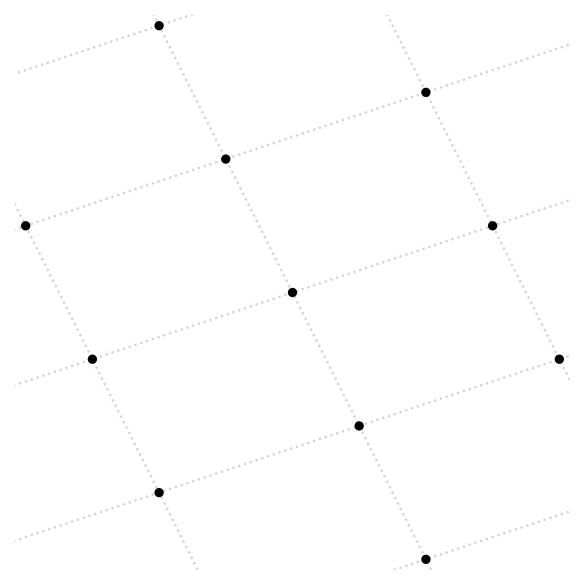

In [ ]:

L = matrix(ZZ, [[ -3, -1],
                [ -1,  2]])

plot_lattice(L,
             grid_radius = 4,
             grid1 = False,
             grid2 = True,
             L_basis = False,
             GS_basis = False,
             LLL_basis = False,
             circles = None,
             dots = None,
             save = True,
             filename = "final_slide_15.png"
            )

#circles = [((0, 0), sqrt(5), "r", 'blue')],
#dots = [((3, 2), "d", 'red')],

In [ ]:
n = 5 # dimension
q = 16 # size of matrix entries


FPLLL.set_random_seed(43)

while True:
    M = IntegerMatrix.random(5, "qary", bits=10, k=3)
    L = LLL.reduction(M)
    
    show(L)
    S = SVP.shortest_vector(L)
    show(L)
    print(type(S), S)
    
    S_iv = IntegerVectors(S)
    print(S_iv.norm())  # <class 'fpylll.fpylll.IntegerVector'>

    if min([ row.norm() for row in L]) != S.norm():
        break

print(M)
print(L)
print(min([ row.norm() for row in L]))
print(S)
print(S.norm())

In [ ]:
from fpylll import IntegerMatrix, LLL, SVP
from fpylll.util import set_random_seed

while True:
    M = IntegerMatrix.random(3, "uniform", bits=5)
    
    
    L = LLL.reduction(copy(M))
    S = SVP.shortest_vector(L)  # tuple (c_1, ..., c_n)
    from sage.all import vector, matrix, ZZ
    
    S_sage = vector(ZZ, S)
    L_sage = matrix(ZZ, L.to_matrix(L))  # Conversion fpylll → Sage
    
    # Vérification
    if min([row.norm() for row in L_sage]) != S_sage.norm():
        break
    
print(M)
print("Base L:")
print(L_sage)
print("Shortest vector as coords (S):", S_sage)


In [ ]:
from fpylll import IntegerMatrix, LLL, SVP
from fpylll.util import set_random_seed
import copy

from sage.all import vector, matrix, ZZ

set_random_seed(42)

while True:
    M = IntegerMatrix.random(3, "uniform", bits=6)
    L = copy.deepcopy(M)

    LLL.reduction(L)

    try:
        S = SVP.shortest_vector(
            L,
            method="proved",
            run_lll=False  # car on a déjà réduit
        )
        break
    except RuntimeError as e:
        print("Failed:", e)
        continue

S_sage = vector(ZZ, S)
L_sage = matrix(ZZ, L.to_matrix(L))

print("LLL-reduced base:")
print(L_sage)
print("Shortest vector:")
print(S_sage)


In [ ]:
from fpylll import IntegerMatrix, LLL, SVP
from fpylll.util import set_random_seed
from sage.all import vector, matrix, ZZ
import copy

while True:
    M = IntegerMatrix.random(2, "uniform", bits=10)
    L = copy.deepcopy(M)
    LLL.reduction(L)

    try:
        s = SVP.shortest_vector(L, method="proved", run_lll=False)
    except RuntimeError:
        # mauvaise base, on recommence
        continue

    s_sage = vector(ZZ, s)
    L_sage = matrix(ZZ, L.to_matrix(L))

    # norme du vecteur le plus court trouvé
    norm_svp = s_sage.norm()

    # norme du premier vecteur de la base LLL
    norm_first = vector(ZZ, L_sage.row(0)).norm()

    if norm_svp != norm_first:
        print((norm_first/norm_svp).n())
        break

# Affichage du contre-exemple
print("Original matrix M:")
print(M)

print("LLL-reduced base L:")
print(L_sage)

print("Norm of first vector in LLL basis:", norm_first)
print("Shortest vector found by SVP:", s_sage)
print("Its norm:", norm_svp)


In [ ]:
1.00412372883521
Original matrix M:
[ 11  1 ]
[  0 11 ]
LLL-reduced base L:
[11  1]
[ 0 11]
Norm of first vector in LLL basis: sqrt(122)
Shortest vector found by SVP: (0, 11)
Its norm: 11

1.06066017177982
Original matrix M:
[ 3 0 2 ]
[ 1 2 3 ]
[ 2 2 0 ]
LLL-reduced base L:
[-2  2  1]
[-1  2 -2]
[ 2  2  0]
Norm of first vector in LLL basis: 3
Shortest vector found by SVP: (2, 2, 0)
Its norm: 2*sqrt(2)

1.04880884817015
Original matrix M:
[ 3 0 2 ]
[ 2 3 1 ]
[ 0 1 3 ]
LLL-reduced base L:
[-1  3 -1]
[-3  1  1]
[ 0  1  3]
Norm of first vector in LLL basis: sqrt(11)
Shortest vector found by SVP: (0, 1, 3)
Its norm: sqrt(10)


1.15470053837925
Original matrix M:
[ 2 2 0 ]
[ 2 0 2 ]
[ 1 3 2 ]
LLL-reduced base L:
[ 2  2  0]
[ 2  0  2]
[-1  1  2]
Norm of first vector in LLL basis: 2*sqrt(2)
Shortest vector found by SVP: (-1, 1, 2)
Its norm: sqrt(6)

1.15470053837925
Original matrix M:
[ 1 0 3 ]
[ 3 0 1 ]
[ 0 2 2 ]
LLL-reduced base L:
[ 2  0 -2]
[ 0  2  2]
[ 1 -2  1]
Norm of first vector in LLL basis: 2*sqrt(2)
Shortest vector found by SVP: (1, -2, 1)
Its norm: sqrt(6)

In [ ]:
from fpylll import IntegerMatrix, LLL, SVP
from fpylll.util import set_random_seed
from sage.all import vector, matrix, ZZ
import copy

set_random_seed(42)

while True:
    M = IntegerMatrix.random(3, "uniform", bits=6)
    L = LLL.reduction(copy.deepcopy(M))  # base réduite

    try:
        # Donner une borne explicite si nécessaire
        bound = max(L[i].norm() for i in range(L.nrows))
        S = SVP.shortest_vector(L, bound=bound)

        S_sage = vector(ZZ, S)
        L_sage = matrix(ZZ, L.to_matrix(L))  # Conversion fpylll → Sage

        # Vérification : le vecteur retourné n'est pas dans la base
        if min([row.norm() for row in L_sage]) != S_sage.norm():
            break
    except RuntimeError as e:
        print("Skipping ill-conditioned base:", e)
        continue

print("Original matrix M:")
print(M)

print("LLL-reduced base L:")
print(L_sage)

print("Shortest vector (as coordinates):")
print(S_sage)


In [ ]:
pR.<x> = GF(7)[]

M = matrix(pR, [[3*x+4,   x^9],
                [    5, x^2+1]])

P, U = M.weak_popov_form(transformation=True)

show(U, M, P)
P.is_weak_popov() and U.is_invertible() and U*M == P

In [ ]:
def pivot(vector_like, indices=None, is_unit=True):
    if indices is None:
        indices = range(len(vector_like))
        
    for i in indices:
        if is_unit:
            if vector_like[i] != 0 and (vector_like[i]).is_unit():
                return vector_like[i], i
        else:
            if vector_like[i] != 0:
                return vector_like[i], i
    return None, None

v = vector(ZZ, [0, 0, 7, 0, 5])

show(pivot(v)) 

v = vector(ZZ, [0, 0, 9, 0, 5])

show(pivot(v))

v = vector(ZZ, [0, 9, 0, 0, 5])

show(pivot(v))

v = vector(Integers(9), [0, 9, 0, 0, 5])

show(pivot(v))

v = vector(GF(9), [0, 5, 0, 0, 5])

show(pivot(v))

def is_row_echelon(A):
    m = A.nrows()
    for i in range (m):
        _, indice = pivot(A.row(i), is_unit=False)
        
    L = [pivot(A.row(i), is_unit=False)[1] for i in range(m)]

    return(all(x < y for x, y in zip(L, L[1:])))



def solve_linear_congruence(a, b, n):
    """
    Résout a*x = b (mod n).
    Renvoie la liste des solutions dans Z/nZ ou lève ValueError.
    """
    from sage.all import gcd, inverse_mod, ZZ
    a = ZZ(a); b = ZZ(b); n = ZZ(n)
    d = gcd(a, n)
    if b % d != 0:
        raise ValueError("Pas de solution : d | b n’est pas satisfait.")
    a1, b1, n1 = a//d, b//d, n//d
    x0 = (inverse_mod(a1, n1) * b1) % n1   # inverse_mod lève une erreur si a1 et n1 ne sont pas coprimes
    return [(x0 + k*n1) % n for k in range(d)]

sols = solve_linear_congruence(2, 8, 12)
print(sols)      # [4, 10]


def ple(A):
    n = A.nrows()
    m = A.ncols()
    
    R = A.base_ring()
    characteristic = R.characteristic()
    P = matrix.identity(R, n)
    L = matrix.identity(R, n)
    E = copy(A)
    
    skip=0
    for i in range(m): #on parcourt les colonnes
        
        pvt, indice_pivot = pivot(E.column(i), range(i-skip, n), is_unit=False) #appel à Pivot, donc caluler complexité et correction de pivot
        
        if pvt is None:
            skip+=1
            continue
        
        if indice_pivot!=i-skip:
            P.swap_rows(i-skip, indice_pivot)
            E.swap_rows(i-skip, indice_pivot)
            
            for k in range(i-skip): #on va modifier les colonnes d'avant
                L[i-skip,k], L[indice_pivot,k] = L[indice_pivot,k], L[i-skip,k]
            
        for j in range(i+1, n+skip):
            sub=E[j-skip, i]/pvt
                
            if sub:
                E = E.with_added_multiple_of_row(j-skip, i-skip, -sub)
                L = L.with_added_multiple_of_row(j-skip, i-skip, -sub)
                
    return P, L, E

In [ ]:
from tqdm import tqdm


for i in tqdm(range(10000),ncols=80, dynamic_ncols=False):
    A = random_matrix(Zmod(12), 3, 4)

    P, L, E = ple(A)
    if not L*P*A==E:
        show(L, P, A, E)
        break
    if not (P.determinant())^2==1:
        show(L, P, A, E)
        break
        
    if not is_row_echelon(E):
        show(L, P, A, E)
        break
    

In [ ]:
F=matrix(Zmod(12), [[9, 3, 11, 3],
                  [5, 7, 6, 10],
                  [9, 5, 7, 7]])

ple(F)

In [ ]:
solve_linear_congruence(11, 12, 12)


In [ ]:
def is_row_echelon(A):
    for i in range (A.nrows()):
        _, indice = pivot(A.row(i), is_unit=False)
    L = [pivot(A.row(i), is_unit=False)[1] for i in range(A.nrows())]

    return(all(x < y for x, y in zip(L, L[1:])))

        
print(E)
is_row_echelon(E)

In [ ]:
A = matrix(ZZ, [[1, 2, 3, 2, 1, 2],
                [1, 2, 3, 2, 1, 2],
                [1, 1, 1, 1, 1, 1],
                [2, 1, 2, 1, 2, 1],
                [2, 2, 2, 2, 2, 2],
                [-2, -1, -2, -1, -2, -1],
                [1, 2, 3, 2, 1, 2],
                [-2, -1, -2, -1, -2, -1]])

A = random_matrix(Integers(9), 3, 3)

show(A)
    
P, L, E = ple(A)

show(L, P*A,"=", E, L*P*A==E)

In [ ]:
from sage.all import ZZ

for _ in range(1000):
    for n, m in [(n, m) for n in range(5, 10) for m in range(5, 10)]:
        for r in range(2, min(n, m)):
            # Matrice entière aléatoire de rang r
            A = random_matrix_of_rank(rank=r, n_rows=n, n_cols=m, ring=ZZ, bound=5, seed=None)

            # Décomposition PLE
            P, L, E = ple(A)

            # Vérifications élémentaires
            assert L.is_triangular()
            assert is_row_echelon(E)
            assert P * L * A == E

In [ ]:
import matplotlib.pyplot as plt
from builtins import float  # force le float natif Python

def plot_log_squared_norms(matrices, ymax=None):
    
    for A in matrices:
        n = A.nrows()
        names = [str(i) for i in range(n)]
        values = [log(A.row(i) * A.row(i)) for i in range(n)]
    
        if ymax is None :
            ymax=max([RR(v) for v in values])+1
        plt.ylim(top=ymax)

        plt.bar(names, values, facecolor='none', edgecolor=random_named_color(),linewidth=1)
        label="ffe"
    # Supprimer les bordures hautes et droites
    ax = plt.gca()  # accéder à l'axe courant
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("nom_du_fichier.png")  # ou .pdf, .svg, etc.

    plt.show()

In [ ]:
F1 = random_full_rank_matrix (17, 17, ZZ, 15, None)



plot_log_squared_norms([F1, F1.LLL()], 8)

In [ ]:


def random_named_color():
    return random.choice(('blue', 'red', 'green'))

In [ ]:
def basis(F, p, mode='v1'):
    G = copy(F)
    P, L, E = ple(G)

    r = F.rank()

    if mode == 'v1':
        for i in range (r):
            L[i, :] *= p
    
    if mode == 'v2':
        for i in range (r):
            L[i, :] = p * matrix.identity(F.nrows())[i, :]
        
    return L*P

F = random_matrix_of_rank(rank=13, n_rows=20,n_cols=20, ring=Integers(7), bound=3, seed=12)

show(basis(F, 5, mode='v1')*F)

show(basis(F, 5, mode='v2')*F)


In [ ]:
F = matrix(ZZ, [[4, 2, 4, 2],
            [2, 1, 2, 1],
            [3, 3, 3, 3],
            [1, 1, 1, 1]])

ple(F)

In [ ]:
def approximant_basis(F, p):
    
    P, L, E = ple(F)
    
    basis = L.change_ring(QQ)
    
    r = F.rank()
    
    
    # Remplacement des r premières lignes par p * I_r
    
    for i in range(r):
        k = pivot(P[i, :].transpose(), range(r+1))[1]+1
        
        basis[k-1, :] = vector(QQ, [p if j == k-1 else 0 for j in range(basis.ncols())])
    
    return basis

def approximant_basis_new(F, p):

    r = F.rank()
    ring_of_F=F.base_ring()
    F = F.change_ring(GF(p))
    
    P, L, E = ple(F)
    
    basis = L.change_ring(ring_of_F) # ca doit etre la
    
    # Remplacement des r premières lignes par p * I_r
    
    for i in range(r):
            
        k = pivot(P[i, :].transpose(), range(P.nrows()+1))[1]+1
        
        basis[k-1, :] = vector(ring_of_F, [p if j == k-1 else 0 for j in range(basis.ncols())])
    
    return basis

def is_approximant_basis(P, F, p, sigma):
        #tester le rang
    result = (P*F).change_ring(Integers(p**sigma))
    
    if not result.is_zero():
        show(result)
        return false
    return true

In [ ]:
F1 = matrix(ZZ, [[6,4,2],
                [3,6,1],
                [9,6,3]])

F1%5

In [ ]:
F1 = matrix(QQ, [[6,4,2],
                [3,6,1],
                [9,6,3]])

F2 = matrix(QQ, [[0,3,1],
                [0,6,2],
                [9,6,3]])

print(latex(approximant_basis(A, p=5**4)))

#print("new basis", approximant_basis_new(F2, p=5**4)*F2)

In [ ]:
from tqdm import tqdm
#marche sur ZZ, pas sur QQ
for i in tqdm(range(10)):
    for p in range(100, 1000):
        F = random_matrix_of_rank (n_rows=8, n_cols=13, rank=5, ring=ZZ, bound=15, seed=None)
        approximant_F = approximant_basis_new(F, Primes()[p]^2)

        if not bool(is_approximant_basis(approximant_F, F, Primes()[p], 2)):
            show(F)

In [ ]:
show(approximant_basis(F, (Primes()[3])**2))

In [ ]:
def principal_minors(A):
    B = A*A.transpose()
    
    return [B[:k, :k].determinant() for k in range(1, B.nrows())]


math.prod([(A*A.transpose())[:k, :k].determinant() for k in range(1, (A*A.transpose()).nrows())])

def control(A):
    minors=principal_minors(A)
    D = math.prod(minors)
    return minors, D

def show_control(A):
    minors, D = control(A)  # contrôle des mineurs principaux
    n = len(minors)
    
    # Construction de la ligne latex : d₂ × d₃ × ... × dₙ
    terms = []
    for i, d in enumerate(minors, start=2):  # d₂, d₃, ...
        terms.append(r"\underbrace{" + str(d) + r"}_{d_" + str(i) + r"}")
    
    product_expr = r" \cdot ".join(terms)
    full_expr = r"\underbrace{" + product_expr + r"}_{D = " + str(D) + r"}"
    
    show(LatexExpr(full_expr))

In [ ]:
def lll_dac_padic(F, p, sigma):
    
    if sigma==1:
        return approximant_basis_new(F, p).LLL()
    
    tau = (sigma + 1) // 2 
    
    V1 = lll_dac_padic(F, p, tau) # appel récursif
    
    F_low = V1 * F / (p ** tau) # Maj du problème
    
    V2 = lll_dac_padic(F_low, p, sigma - tau) # appel récursif décalé
    
    return V2*V1

In [ ]:
p=5
sigma=128

    
F = random_matrix_of_rank(n_rows=6, n_cols=6,rank=3, ring=ZZ, bound=15, seed=None)

basis = approximant_basis_new(F, p**sigma)
basis_reduced = basis.LLL()

_,_,basis_norms=gram_schmidt(basis_reduced)



basis_dac = lll_dac_padic(F, p, sigma)
basis_dac_reduced = basis_dac.LLL()

_,_,basis_dac_norms=gram_schmidt(basis_dac_reduced)


for i in range(6):
    print((basis_norms[i]/basis_dac_norms[i]).n(14))

In [ ]:
plot_log_squared_norms([(basis_norms[i]/basis_dac_norms[i]).n(14) for i in range(6)], 30)

In [ ]:
def plot_log_squared_norms(valeurs, ymax=None):
    
    for A in valeurs:
        names = [str(i) for i in range(len(valeurs))]
        values = [valeur for valeur in valeurs]
    
        if ymax is None :
            ymax=max([RR(v) for v in values])+1
        plt.ylim(top=ymax)

        plt.bar(names, values, facecolor='none', edgecolor=random_named_color(),linewidth=1)
        label="ffe"
    # Supprimer les bordures hautes et droites
    ax = plt.gca()  # accéder à l'axe courant
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("nom_du_fichier.png")  # ou .pdf, .svg, etc.

    plt.show()

In [ ]:
def Lovasz(O, mu, norm_squared, i):
    
    n_rows = O.nrows()
    n_cols = O.ncols()
    
    
    new_mu = copy(mu)
    new_O = copy(O)
    new_norm_squared = copy(norm_squared)

    #bon ordre logique
    
    for k in range(i):
        new_mu[i, k], new_mu[i+1, k] = new_mu[i+1, k], new_mu[i, k]
    
    new_norm_squared[i] = norm_squared[i+1] + (mu[i+1, i]**2) * norm_squared[i]
    
    rapport = norm_squared[i]/new_norm_squared[i]
    
    new_mu[i+1, i] = rapport*mu[i+1, i]
    
    
    new_norm_squared[i+1] = norm_squared[i]-(new_mu[i+1, i]**2)*new_norm_squared[i]
    
    for k in range(i+1+1, n_rows):
        new_mu[k, i] = mu[k, i] * mu[i+1, i] * norm_squared[i] + mu[k, i+1] * norm_squared[i+1]
    
        new_mu[k, i]/=new_norm_squared[i]
    

        new_mu[k, i+1] = mu[k, i]*(1-mu[i+1, i]*new_mu[i+1, i])*norm_squared[i] - mu[k, i+1]*new_mu[i+1,i]*norm_squared[i+1]
        #new_mu[k, i+1] = mu[k, i]* mu[i+1, i] * norm_squared[i] - mu[k, i+1]*new_mu[i+1,i]*norm_squared[i+1]
        
        new_mu[k, i+1]/=new_norm_squared[i+1]
    
    new_O[i] = O[i+1] + mu[i+1, i] * O[i]
    new_O[i+1] = O[i]-new_mu[i+1, i]*new_O[i]
    #fin bon ordre logique
    
    return new_mu, new_O, new_norm_squared
    
for i in range(10):
    A =random_full_rank_matrix(ring = ZZ,
                               n_rows = 6,
                               n_cols = 6,
                               seed = None,
                               bound = 2^2)
    
    mu, O, norm_squared = gram_schmidt(A)
    
    new_mu, new_O, new_norm_squared = Lovasz(O, mu, norm_squared, 3)
    show(norm_squared[3]*norm_squared[4]==new_norm_squared[3]*new_norm_squared[4])